# Data Science Project: Assessment 3

ID: 201484831

Name: Praveen Gopal Reddy

This assessment has a 60% weight.

## Case study

Refer to the brief

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives

The given dataset contains 30 independent variables and one target variable. features V1 to V28 are transformed via PCA and time,amount feature are not transformed with PCA. The fraudulent transactions are denoted by class label 1 and the non fraudulent transactions are denoted by class label 0.

The aims of our project are :

1. clean outliers and highly correlated input variable if present.
2. Scale the amount variable and remove time variable
3. since data is imbalanced , we will apply upsampling technique to make balanced data.
4. Build the model and evaluate train set results with appropriate metrics
5. Predict test set results( using cross-validation tecnhique model) and evaluate the test set metrics.
6. Plot ROC-AUC and precision-recall curve for model evaluation.

The objectives of our project is :

1. Build the best model such that false negatives are low as possible because classifying a fraudulent transaction as a non- fradulent one is very expensive than classifying a non-fraudulent transaction as fraudulent one.
   Hence our model should have good recall accuracy

2. Ideally we want True postives and True negatives to be high and False postives and false negatives(recall) to be very low.
   Hence balanced accuray, recall, precision score,F1 score must be high.


###  b) Plan
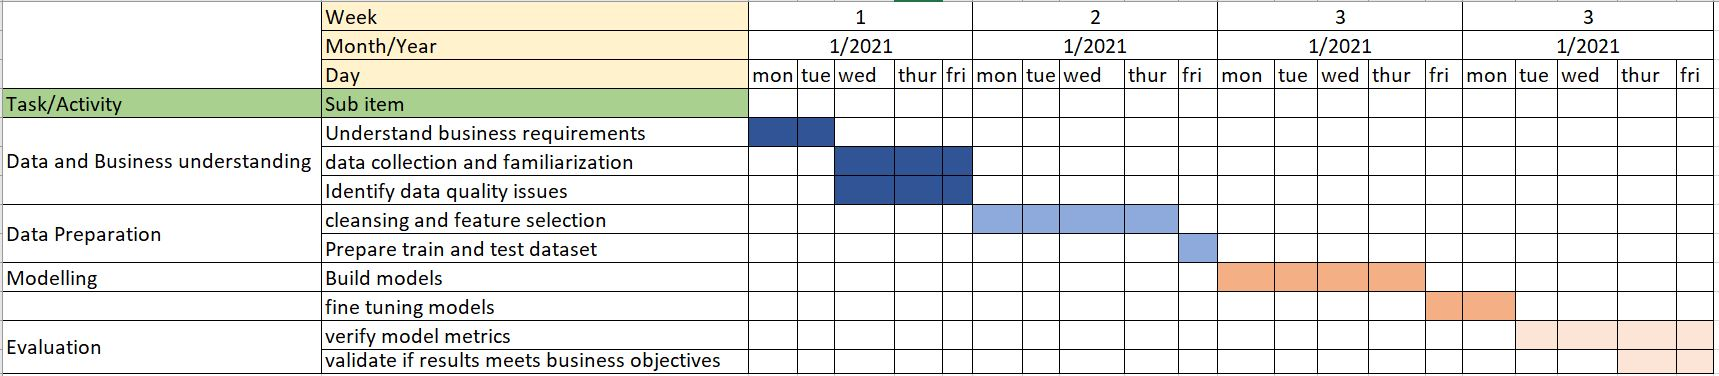

## 2. Understanding the case study (4 marks)

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)


1. It is found that fraudulent cases constitute small percentage in the dataset, hence it will result an imbalanced dataset, So, inorder to achieve good performace of the model, we must use resampling techniques to make dataset balanced one.

2. If model classifies fraudulent but in reality it is not fradulent then it cost bank 1000 pound. so inorder to address banks needs , we must focus on type 1 error( false postives) to be low as much as possible. In other words precision must have good score.

3. If model classifies non-fradulent but in reality it is fradulent then it cost bank 10,000 pounds on average. So we must 
   decrease False negatives as much as possible which means recall score must be high.
   
4. Since bank focuses both on recall and precision performance, and when predicting on original test dataset it will have     imbalanced class lables, so we must focus on F1-score accuracy,precision recall curve, balanced accuracy for choosing best  model.

5. Overall bank expects good balanced accuracy, F1-score, recall score, precision score to address their requirements.



## 3. Pre-processing applied (20 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


###  a) Preparing the labels appropriately

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#load the file into dataframe
data_frame = pd.read_csv('creditcard.csv')

# prepare the lables
X = data_frame.drop('Class',axis=1)  # input variables
y = data_frame['Class']    # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

print('train data:', X_train.shape[0])
print('test data:', X_test.shape[0])

train data: 199364
test data: 85443


###  b) Removing synonymous and noisy attributes


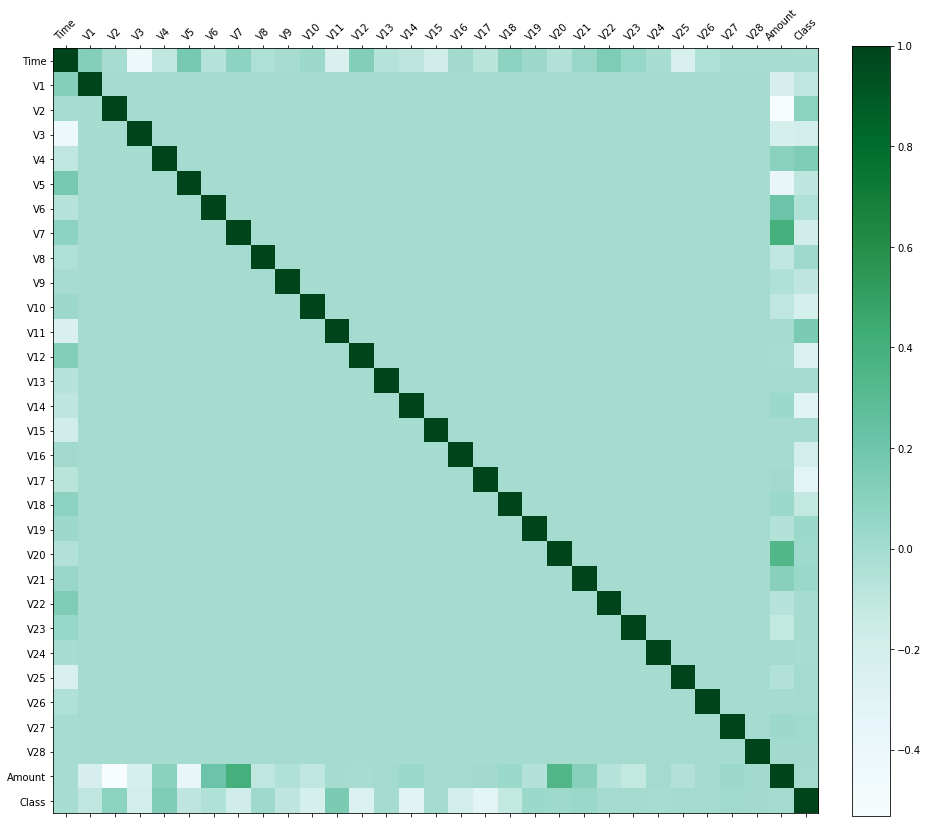

In [5]:
#lets check synonymous features i.e equivalency between label and input features by checking correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))
mat=ax.matshow(data_frame.corr(),cmap='BuGn')
plt.xticks(np.arange(31),data_frame.columns,rotation=45)
plt.yticks(np.arange(31),data_frame.columns)
plt.colorbar(mat,fraction=0.046,pad=0.04)
plt.show()

# time is not an important variable lets remove this attribute from X_train and X_test labels
X_train=X_train.drop(['Time'], axis=1,inplace=False)
X_test=X_test.drop(['Time'], axis=1,inplace=False)

1. from above plot , we can clearly see there is no strong correlation between class label and other input variables. Hence, no need to remove any synonmous attributes
2. Time attribute has been removed since it is not an imporant variable.

###  c) Dealing with missing values


In [6]:
print('data frame shape before using dropna :',data_frame.shape)

# drop the rows that have at least one element missing
droppedna = data_frame.dropna() 

# Verify the dimension of the data after dropna
print('data frame shape after using dropna :',droppedna.shape)
print('data frame dimension before and after is same, so there is no missing values')

########  or   #########   False means - no missing values,  True means has missing values  

print(data_frame.isnull().values.any())

data frame shape before using dropna : (284807, 31)
data frame shape after using dropna : (284807, 31)
data frame dimension before and after is same, so there is no missing values
False


###  d) Rescaling if necessary


In [7]:
from sklearn.preprocessing import RobustScaler
import numpy as np
pd.options.mode.chained_assignment = None 

#Robust scaler is robust with outliers
scaler1 = RobustScaler()
# Variables V1 to V28 are transformed via PCA and scaled. the only variable we need scaling is amount variable.
#rescale amount variable on X_train and X_test

scaler1.fit(X_train[['Amount']])
X_train["scaled_amount"] = scaler1.transform(X_train[['Amount']])
X_test["scaled_amount"]  = scaler1.transform(X_test[['Amount']])

#drop the unscaled Amount  variable
X_train = X_train.drop(['Amount'],axis = 1,inplace=False)
X_test = X_test.drop(['Amount'],axis = 1,inplace=False)

### e) Other    -   Dealing with class imbalance 

In [8]:
# percentage of fraud transactions class = 1
fraud = data_frame['Class'].value_counts()[1]
non_fraud = data_frame['Class'].value_counts()[0]
ratio = (fraud/non_fraud) * 100
print('Ratio of Fraud to Non-Fraudulent: {fraud}/{non_fraud} = {ratio:.3f}%'.format(fraud=fraud,non_fraud=non_fraud,ratio=ratio))

Ratio of Fraud to Non-Fraudulent: 492/284315 = 0.173%


In [9]:
from sklearn.utils import resample
####################### Lets use up sampling to deal with imbalance data #####################
# concatenate training data back together
dframe = pd.concat([X_train, y_train], axis=1)

#prepapre dataframe for majority and minority class
dframe_majority = dframe[dframe.Class==0]
dframe_minority = dframe[dframe.Class==1]

# Upsample minority class
dframe_minority_upsampled = resample(dframe_minority, 
                                 replace=True, 
                                 n_samples=len(dframe_majority),
                                 random_state=1234)
 
# Combine majority class with upsampled minority class
dframe_upsampled = pd.concat([dframe_majority,dframe_minority_upsampled])


In [10]:
fraud = dframe_upsampled['Class'].value_counts()[1]
non_fraud = dframe_upsampled['Class'].value_counts()[0]
print(fraud)
print(non_fraud)

199032
199032


In [11]:
X_train_upsampled = dframe_upsampled.drop('Class',axis=1)  # input variables
y_train_upsampled = dframe_upsampled['Class']    # target variable

## 4. Technique 1 (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

#### The below are the reasons for choosing random forest technique.

1. The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a 
   subset of data. It aggregates votes from different decision trees. So, end results are reliable.
2. Randform forest is robust algorihtm and very stable. Even if there is minute change  in the dataset the overall algorithm  is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees
3. Randform forest works well on missing  values or it has not been scaled well.
4. Random forest dont suffer from the overfitting problem. It is because it takes the average of all the predictions, which cancels out the biases.

#### Schematic process of Random forest model.


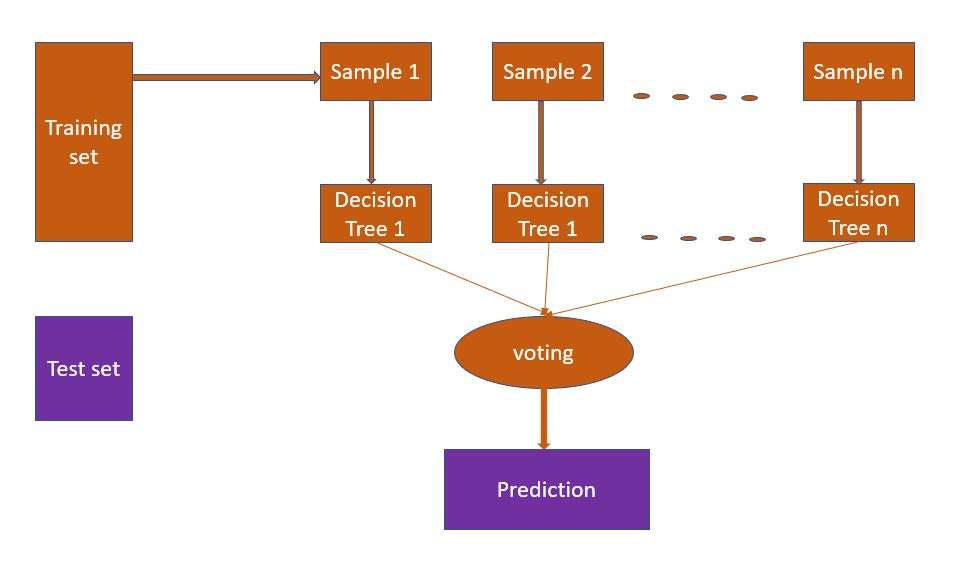


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale


In [71]:
#Setting hyper parameters for random forest 
params = {'max_depth': [10,15], # Deeper the tree, more the splits and hence more information to capture.
          'min_samples_leaf': [25, 50], # minimum number of samples in the leaf node after splitting a node
          'min_samples_split': [20, 40], # the minimum number of samples required to split an internal node
          'n_estimators':[100]
         }

### c) Optimising hyper parameters


In [72]:
# create grid search and fit the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime as dt
st=dt.now()

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

rf_grid = RandomForestClassifier(random_state=100)
grid_model_rf = GridSearchCV(estimator=rf_grid, 
                                 cv = folds, 
                                 param_grid=params, 
                                 scoring='average_precision',
                                 return_train_score=True,
                                 n_jobs=-1, 
                                 verbose=1)
#fit the model
grid_model_rf.fit(X_train_upsampled, y_train_upsampled)
print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Time taken to complete random search:  0:20:14.982198


In [137]:
# Best params
print('Best params: %s' % grid_model_rf.best_params_)

Best params: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100}


In [74]:
# Initialize the Random Forest model with best parameters
rf_final = RandomForestClassifier(max_depth = 15, 
                                      n_estimators = 100,
                                      min_samples_leaf = 25, 
                                      min_samples_split = 20,
                                     random_state=100)
# Fit the model
rf_final.fit(X_train_upsampled, y_train_upsampled)
# Predict the fraud transactions on Training data
y_pred = rf_final.predict(X_train_upsampled)

### d) Performance metrics for training

In [110]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report, f1_score,accuracy_score,roc_curve, auc
from sklearn.metrics import plot_precision_recall_curve,precision_recall_curve,recall_score,average_precision_score,balanced_accuracy_score

#F1 score , AUC, Classification report and confusion matrix of Training data.

print("Metrics for Random Forest on Training")
print('******************************************')
#Accuracy
bal_accuracy_train_teqn1 = balanced_accuracy_score(y_train_upsampled,y_pred)
print('Balanced Accuracy :',bal_accuracy_train_teqn1)
print('---------------------')
#F1 score
f1_train_teqn1 = f1_score(y_train_upsampled,y_pred)
print('F1 score :',f1_train_teqn1)
print('---------------------')
#recall
recall_train_teqn1 = recall_score(y_train_upsampled,y_pred)
print('Recall score :',recall_train_teqn1)
print('---------------------')
#precision
precision_train_teqn1 = precision_score(y_train_upsampled,y_pred)
print('Precision score :',precision_train_teqn1)
print('---------------------')
# AUC Score
# AUC Score
y_pred_probs_rf = rf_final.predict_proba(X_train_upsampled)[:,1]
roc_train_teqn1 = roc_auc_score(y_train_upsampled,y_pred_probs_rf)
print("ROC AUC score : {:2.2f}".format(roc_train_teqn1))
print('---------------------')
#classification repor
print("classification report")
print('---------------------')
print(classification_report(y_train_upsampled, y_pred_lr))

Metrics for Random Forest on Training
******************************************
Balanced Accuracy : 0.9998367096748262
---------------------
F1 score : 0.9998367363342032
---------------------
Recall score : 1.0
---------------------
Precision score : 0.9996735259697535
---------------------
ROC AUC score : 1.00
---------------------
classification report
---------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199032
           1       0.97      0.92      0.95    199032

    accuracy                           0.95    398064
   macro avg       0.95      0.95      0.95    398064
weighted avg       0.95      0.95      0.95    398064



C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


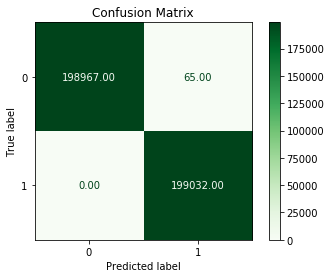

In [76]:
# Plot confusion matrix for training dataset
from sklearn.metrics import plot_confusion_matrix
cf = plot_confusion_matrix(rf_final, X_train_upsampled, y_train_upsampled,
                                 display_labels=['0','1'],
                                 cmap=plt.cm.Greens,
                                 values_format = '.2f')
cf.ax_.set_title("Confusion Matrix")
plt.show()

C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

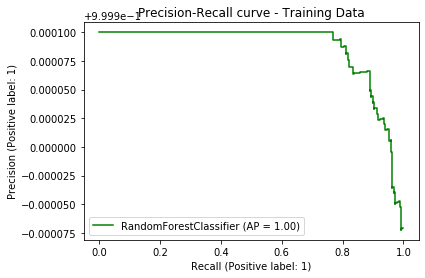

In [77]:
# precision and recall curve
prc = plot_precision_recall_curve(rf_final, X_train_upsampled, y_train_upsampled, color = "green")
prc.ax_.set_title('Precision-Recall curve - Training Data') 

## 5. Technique 2 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

#### The reasons for choosing Logistic regression are :

1. It is efficient and straight forward, doesn't require high computation power.
2. It is much fater than decision tress, easy to implement and interpret.
3. It provides regularization (L1,L2) methods to solve overfitting problems.

#### Schematic process of logistic regression:

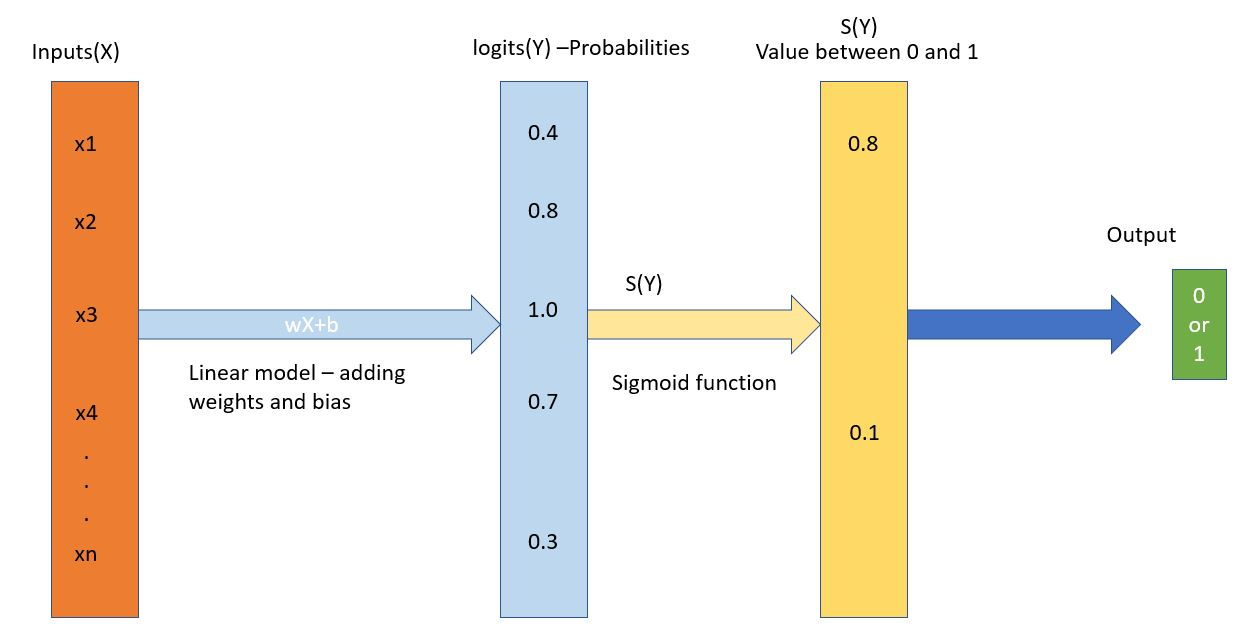



#### Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params_lr = {'C':[0.01,0.5,1,5,10,15,20,25,30],   # regularization strength 
          'penalty':['l2'],                       #using l2 to reduce the liklihood of model overfitting
          'solver':['lbfgs']}                     #to improve computation 

### c) Optimising hyper parameters


In [26]:
from datetime import datetime as dt
st=dt.now()

# create model
log_reg = LogisticRegression(max_iter = 500, random_state = 100)

# Create GridSearch 
grid_model_logreg = GridSearchCV(estimator=log_reg, 
                             param_grid=params_lr, 
                             scoring='average_precision',
                             return_train_score=True,
                             n_jobs=-1, 
                             verbose=1)

grid_model_logreg.fit(X_train_upsampled, y_train_upsampled)
print("Time taken to complete: ",dt.now()-st)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Time taken to complete:  0:01:55.565752


In [138]:
# Best params
print('Best params: %s' % grid_model_logreg.best_params_)

Best params: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}


In [15]:
# Initialize the Logistic regression  model with best parameters
logreg_final = LogisticRegression(C = 20, solver = 'lbfgs', penalty = 'l2', max_iter=500, random_state = 100)
# Fit the model
logreg_final.fit(X_train_upsampled, y_train_upsampled)
# Predict the fraud transactions on Training data
y_pred_lr = logreg_final.predict(X_train_upsampled)

### d) Performance metrics for training

In [109]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, plot_precision_recall_curve,precision_recall_curve
from sklearn.metrics import f1_score,recall_score,average_precision_score,precision_score,roc_auc_score,balanced_accuracy_score

#Balanced accuracy, recall,precision, Classification report and confusion matrix of Training data.

print("Metrics for Logistic Regression on Training")
print('******************************************')
#Accuracy
bal_accuracy_train_teqn2 = balanced_accuracy_score(y_train_upsampled,y_pred_lr)
print('Balanced Accuracy :',bal_accuracy_train_teqn2)
print('---------------------')
#F1 score
f1_score_train_teqn2 = f1_score(y_train_upsampled,y_pred_lr)
print('F1 score :',f1_score_train_teqn2)
print('---------------------')
#recall
recall_train_teqn2 = recall_score(y_train_upsampled,y_pred_lr)
print('Recall score :',recall_train_teqn2)
print('---------------------')
#precision
precision_train_teqn2 = precision_score(y_train_upsampled,y_pred_lr)
print('Precision score :',precision_train_teqn2)
print('---------------------')
# AUC Score
y_pred_probs_lr = logreg_final.predict_proba(X_train_upsampled)[:,1]
roc_train_teqn2 = roc_auc_score(y_train_upsampled,y_pred_probs_lr)
print("ROC AUC score : {:2.2f}".format(roc_train_teqn2))
print('---------------------')
#classification repor
print("classification report")
print('---------------------')
print(classification_report(y_train_upsampled, y_pred_lr))

Metrics for Logistic Regression on Training
******************************************
Balanced Accuracy : 0.9485107922344146
---------------------
F1 score : 0.9470740436608153
---------------------
Recall score : 0.9213644037139757
---------------------
Precision score : 0.9742596665710369
---------------------
ROC AUC score : 0.99
---------------------
classification report
---------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199032
           1       0.97      0.92      0.95    199032

    accuracy                           0.95    398064
   macro avg       0.95      0.95      0.95    398064
weighted avg       0.95      0.95      0.95    398064



C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


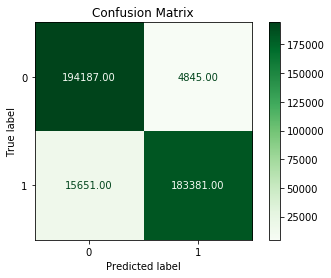

In [19]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
cf = plot_confusion_matrix(logreg_final, X_train_upsampled, y_train_upsampled,
                                 display_labels=['0','1'],
                                 cmap=plt.cm.Greens,
                                 values_format = '.2f')
cf.ax_.set_title("Confusion Matrix")
plt.show()

C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

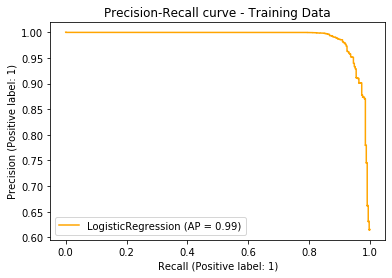

In [20]:
from sklearn.metrics import plot_precision_recall_curve
prc = plot_precision_recall_curve(logreg_final, X_train_upsampled, y_train_upsampled, color = "orange")
prc.ax_.set_title('Precision-Recall curve - Training Data') 

## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

In [78]:
# CV for technique 1  --- Random forest 
from sklearn.model_selection import StratifiedKFold
NUM_TRIALS =  5


# Loop for each trial
for i in range(NUM_TRIALS):
   

    # cross validation technique using StratifiedKFold
    CV = StratifiedKFold(n_splits = 3, shuffle = True, random_state = i)  

    #grid search
    grid_RF_cv = GridSearchCV(estimator=rf_grid,    #rf_grid already defined in 4.b) question
                             param_grid=params,     #params already defined in 4.b) question
                             cv=CV,
                             scoring='average_precision',
                             return_train_score=True,
                             n_jobs=-1, 
                             verbose=1)
    grid_RF_cv.fit(X_train_upsampled, y_train_upsampled)
    
    print("tuned parameters:",grid_RF_cv.best_params_)
    print("accuracy of parameters:",grid_RF_cv.best_score_)

print('------------------------------------')
print("Time taken to complete: ",dt.now()-st)  

Fitting 3 folds for each of 8 candidates, totalling 24 fits
tuned parameters: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100}
accuracy of parameters: 0.9999711778273656
Fitting 3 folds for each of 8 candidates, totalling 24 fits
tuned parameters: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100}
accuracy of parameters: 0.9999641592313612
Fitting 3 folds for each of 8 candidates, totalling 24 fits
tuned parameters: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100}
accuracy of parameters: 0.9999687861207978
Fitting 3 folds for each of 8 candidates, totalling 24 fits
tuned parameters: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100}
accuracy of parameters: 0.9999614475320611
Fitting 3 folds for each of 8 candidates, totalling 24 fits
tuned parameters: {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 100

In [79]:
# Initialize the Random forest  model with best parameters obtained from Cross validation
rf_final2 = RandomForestClassifier(max_depth = 15, 
                                      min_samples_leaf = 25, 
                                      min_samples_split = 20,
                                      n_estimators=100,
                                     random_state=100)

# Fit the model
rf_final2.fit(X_train_upsampled, y_train_upsampled)

#Predict the fraud transactions on testing data
y_pred_test_rf = rf_final2.predict(X_test)
y_pred_test_rf_proba = rf_final2.predict_proba(X_test)[:,1]

In [28]:
# CV for technique 2  --- logistic regression 
from sklearn.model_selection import StratifiedKFold
NUM_TRIALS =  10

print("Cross validation for Technique2 - Logistic Regression")
print('******************************************')
# Loop for each trial
for i in range(NUM_TRIALS):
   

    # cross validation technique using StratifiedKFold
    CV = StratifiedKFold(n_splits = 3, shuffle = True, random_state = i)  

    #grid search
    grid_lr_cv = GridSearchCV(estimator=log_reg, 
                             param_grid=params_lr,
                             cv=CV,
                             scoring='average_precision',
                             return_train_score=True,
                             n_jobs=-1, 
                             verbose=1)
    grid_lr_cv.fit(X_train_upsampled, y_train_upsampled)
    
    print("tuned parameters:",grid_lr_cv.best_params_)
    print("accuracy of parameters:",grid_lr_cv.best_score_)
    
print("Time taken to complete: ",dt.now()-st)    

Cross validation for Technique2 - Logistic Regression
******************************************
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned parameters: {'C': 30, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of parameters: 0.9893368253104132
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned parameters: {'C': 25, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of parameters: 0.9893364634063989
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned parameters: {'C': 30, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of parameters: 0.9893434584267449
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned parameters: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of parameters: 0.9893456834692654
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned parameters: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy of parameters: 0.9893376506510255
Fitting 3 folds for each of 9 candidates, totalling 27 fits
tuned pa

In [31]:
# Initialize the Logistic regression  model with best parameters obtained from Cross validation
logreg_final2 = LogisticRegression(C = 30, solver = 'lbfgs', penalty = 'l2', max_iter=500, random_state = 100)

# Fit the model
logreg_final2.fit(X_train_upsampled, y_train_upsampled)

#Predict the fraud transactions on testing data
y_pred_test_lr = logreg_final.predict(X_test)
y_pred_test_lr_proba = logreg_final.predict_proba(X_test)[:,1]

### b) Comparison with appropriate metrics for testing

In [117]:
#function to calculate metrics for testing for technique 1 - Random forest
def metrics_for_testing_technique1(y_test,y_pred,y_probs,model,X_test):
   
    test_metrics_dict=dict()
    #f1 score
    f1_score_test_techn1 = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') 
    test_metrics_dict['f1_score_test_techn1']=f1_score_test_techn1
    print('|      F1 Score      |')
    print('---------------------')
    print('{}\n'.format(f1_score_test_techn1))      
    
    #balanced accuracy
    bal_accuracy_test_techn1 = metrics.balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['bal_accuracy_test_techn1']=bal_accuracy_test_techn1
    print('|  Balanced Accuracy |')
    print('---------------------')
    print('{}\n'.format(bal_accuracy_test_techn1))
    
    #recallscore
    recall_test_techn1 = recall_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['recall_test_techn1']=recall_test_techn1
    print('|      Recall        |')
    print('---------------------')
    print('{}\n'.format(recall_test_techn1))
    
    #precision
    precision_test_techn1 = precision_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['precision_test_techn1']=precision_test_techn1
    print('|      Precision     |')
    print('---------------------')
    print('{}\n'.format(recall_test_techn1))
    
    #roc under precision recall curve
    roc_test_techn1 = roc_auc_score(y_true=y_test, y_score=y_probs)
    test_metrics_dict['roc_test_techn1']=roc_test_techn1
    print('|      ROC AUC      |')
    print('---------------------')
    print('{}\n'.format(roc_test_techn1))   
                   
    #classification report
    print('| Classifiction Report |')
    print('-----------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    print(classification_report)
    
    cf = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['0','1'],
                                 cmap=plt.cm.Greens,
                                 values_format = '.2f')
    cf.ax_.set_title("Confusion Matrix")
    plt.show()
    return test_metrics_dict

Metrics for Random Forest on Testing - Technique 1
******************************************
|      F1 Score      |
---------------------
0.9992392589211521

|  Balanced Accuracy |
---------------------
0.9185213495069358

|      Recall        |
---------------------
0.8375

|      Precision     |
---------------------
0.8375

|      ROC AUC      |
---------------------
0.9707578371422204

| Classifiction Report |
-----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.77      0.84      0.80       160

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


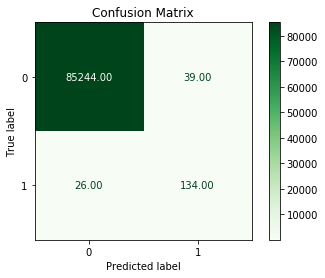

In [118]:
print("Metrics for Random Forest on Testing - Technique 1")
print('******************************************')

#call the function to calculate metrics
test_metrics_tecnq1=metrics_for_testing_technique1(y_test,y_pred_test_rf,y_pred_test_rf_proba,rf_final2,X_test)

In [126]:
# lets compare the results for train set and test set for technique 1 - Random forest

print("Comparison of Train and Test results for technique 1 - Random Forest")
print('**************************************************************************')
print('\n')
print('\n              balanced Accuracy    F-measure    Recall      Precision    AUC-ROC')
print('                ---------------   --------    --------       -------     -------')

print('Train set        : {:.04}%          {:.04}%       {:.04}%       {:.04}%        {:.04}%'.format(bal_accuracy_train_teqn1*100,
                                                                                      f1_train_teqn1 * 100, 
                                                                                      recall_train_teqn1 * 100, 
                                                                                      precision_train_teqn1 * 100,
                                                                                      roc_train_teqn1 * 100))
print('Test set         : {:.04}%          {:.04}%       {:.04}%       {:.04}%        {:.04}%'.format(test_metrics_tecnq1['bal_accuracy_test_techn1'] * 100,
                                                                                      test_metrics_tecnq1['f1_score_test_techn1'] * 100, 
                                                                                      test_metrics_tecnq1['recall_test_techn1'] * 100, 
                                                                                      test_metrics_tecnq1['precision_test_techn1']*100,
                                                                                      test_metrics_tecnq1['roc_test_techn1'] * 100))

print('\n\n\n')
print('**************************************************************************')

Comparison of Train and Test results for technique 1 - Random Forest
**************************************************************************



              balanced Accuracy    F-measure    Recall      Precision    AUC-ROC
                ---------------   --------    --------       -------     -------
Train set        : 99.98%          99.98%       100.0%       99.97%        100.0%
Test set         : 91.85%          99.92%       83.75%       77.46%        97.08%




**************************************************************************


In [129]:
#function to calculate metrics for testing for technique 2 - logistic regression
def metrics_for_testing_technique2(y_test,y_pred,y_probs,model,X_test):
   
    test_metrics_dict=dict()
    #f1 score
    f1_score_test_techn2 = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') 
    test_metrics_dict['f1_score_test_techn2']=f1_score_test_techn2
    print('|      F1 Score      |')
    print('---------------------')
    print('{}\n'.format(f1_score_test_techn2))      
    
    #balanced accuracy
    bal_accuracy_test_techn2 = metrics.balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['bal_accuracy_test_techn2']=bal_accuracy_test_techn2
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('{}\n'.format(bal_accuracy_test_techn2))
    
    #recallscore
    recall_test_techn2 = metrics.recall_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['recall_test_techn2']=recall_test_techn2
    print('|      Recall        |')
    print('---------------------')
    print('{}\n'.format(recall_test_techn2))
    
    #precision
    precision_test_techn2 = precision_score(y_true=y_test, y_pred=y_pred)
    test_metrics_dict['precision_test_techn2']=precision_test_techn2
    print('|      Precision     |')
    print('---------------------')
    print('{}\n'.format(precision_test_techn2))
    
    #roc under precision recall curve
    roc_test_techn2 = roc_auc_score(y_true=y_test, y_score=y_probs)
    test_metrics_dict['roc_test_techn2']=roc_test_techn2
    print('|      ROC AUC      |')
    print('---------------------')
    print('{}\n'.format(roc_test_techn2))   
                   
    #classification report
    print('| Classifiction Report |')
    print('-----------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    print(classification_report)
    
    cf = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['0','1'],
                                 cmap=plt.cm.Greens,
                                 values_format = '.2f')
    cf.ax_.set_title("Confusion Matrix")
    plt.show()
    return test_metrics_dict

Metrics for Logistic Regression on Testing -Technique 2
******************************************
|      F1 Score      |
---------------------
0.9751647297028428

| Balanced Accuracy  |
---------------------
0.9438911477082186

|      Recall        |
---------------------
0.9125

|      Precision     |
---------------------
0.064773735581189

|      ROC AUC      |
---------------------
0.9849323722195514

| Classifiction Report |
-----------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85283
           1       0.06      0.91      0.12       160

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



C:\Users\PG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


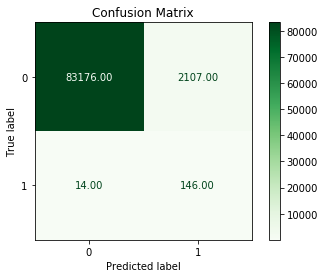

In [130]:
print("Metrics for Logistic Regression on Testing -Technique 2")
print('******************************************')

#call the function to calculate metrics
test_metrics_tecnq2=metrics_for_testing_technique2(y_test, y_pred_test_lr,y_pred_test_lr_proba,logreg_final2,X_test)

In [134]:
# lets compare the results for train set and test set for technique 2 - logistic regression

print("Comparison of Train and Test results for technique 2 - Logistic regression")
print('**************************************************************************')
print('\n')
print('\n              balanced Accuracy    F-measure     Recall      Precision    AUC-ROC')
print('                ---------------      ---------    --------     -------   --------')

print('Train set        : {:.04}%           {:.04}%       {:.04}%       {:.04}%     {:.04}%'.format(bal_accuracy_train_teqn2*100,
                                                                                    f1_score_train_teqn2 * 100, 
                                                                                    recall_train_teqn2 * 100, 
                                                                                    precision_train_teqn2 * 100,
                                                                                    roc_train_teqn2 * 100))
print('Test set         : {:.04}%           {:.04}%       {:.04}%       {:.04}%     {:.04}%'.format(test_metrics_tecnq2['bal_accuracy_test_techn2']*100,
                                                                                    test_metrics_tecnq2['f1_score_test_techn2'] * 100, 
                                                                                    test_metrics_tecnq2['recall_test_techn2'] * 100, 
                                                                                    test_metrics_tecnq2['precision_test_techn2']*100,
                                                                                    test_metrics_tecnq2['roc_test_techn2'] * 100))

print('\n\n\n')
print('**************************************************************************')

Comparison of Train and Test results for technique 2 - Logistic regression
**************************************************************************



              balanced Accuracy    F-measure     Recall      Precision    AUC-ROC
                ---------------      ---------    --------     -------   --------
Train set        : 94.85%           94.71%       92.14%       97.43%     98.69%
Test set         : 94.39%           97.52%       91.25%       6.477%     98.49%




**************************************************************************


### c) Model selection (ROC or other charts)

ROC-AUC curve for both techniques on test data
**********************************************
AUC(logistic regression) : 0.98493


AUC(Random forest): 0.97076


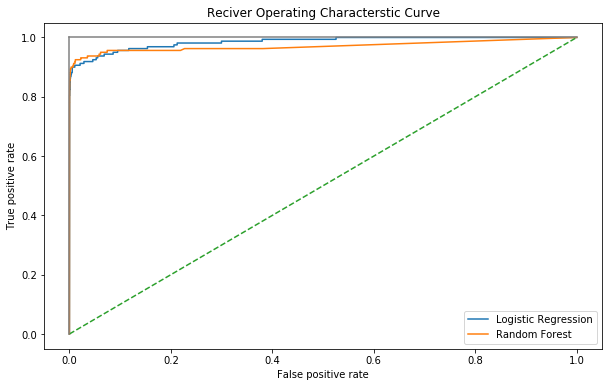

In [94]:
# plot roc-auc curve for both techniques on test data
print("ROC-AUC curve for both techniques on test data")
print('**********************************************')
logistic_false_positive_rate,logistic_true_positive_rate,logistic_threshold = roc_curve(y_test,y_pred_test_lr_proba)
random_false_positive_rate,random_true_positive_rate,random_threshold = roc_curve(y_test,y_pred_test_rf_proba)

print('AUC(logistic regression) :', round(auc(logistic_false_positive_rate, logistic_true_positive_rate),5))
print('\n')
print('AUC(Random forest):', round(auc(random_false_positive_rate, random_true_positive_rate),5))
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(logistic_false_positive_rate,logistic_true_positive_rate,label='Logistic Regression')
plt.plot(random_false_positive_rate,random_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

**********************************************


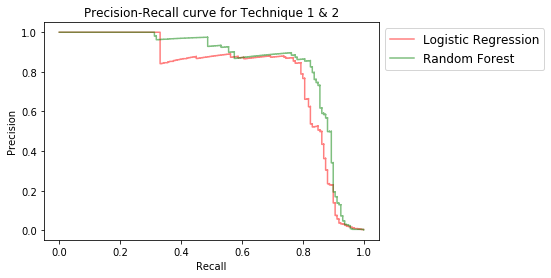

In [96]:
# plot precision recall curve on test data for both models
from sklearn.metrics import precision_recall_curve
print('**********************************************')
logistic_precision, logistic_recall, logistic_thresholds = precision_recall_curve(y_test, y_pred_test_lr_proba)
random_precision, random_recall, random_thresholds = precision_recall_curve(y_test, y_pred_test_rf_proba)

#plot
plt.step(logistic_recall, logistic_precision, color='red', alpha=0.5,linewidth=1.5,label='Logistic Regression')
plt.step(random_recall, random_precision, color='green', alpha=0.5,linewidth=1.5,label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Technique 1 & 2')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

In [139]:
# lets compare the results for test set for technique 1 & 2 - Random forest and logistic regression

print("Comparison of Test results for technique 1 & 2 - Random forest and Logistic regression")
print('\n')
print('**************************************************************************************')
print('\n')
print('\n                       balanced Accuracy    F-measure      Recall     Precision     AUC-ROC')
print('                         ---------------      ----------    --------     -------     -------')

print('Random Forest            : {:.04}%            {:.04}%       {:.04}%       {:.04}%     {:.04}%'.format(test_metrics_tecnq1['bal_accuracy_test_techn1'] * 100,
                                                                                             test_metrics_tecnq1['f1_score_test_techn1'] * 100, 
                                                                                             test_metrics_tecnq1['recall_test_techn1'] * 100, 
                                                                                             test_metrics_tecnq1['precision_test_techn1']*100,
                                                                                             test_metrics_tecnq1['roc_test_techn1'] * 100))
print('Logistic Regression      : {:.04}%            {:.04}%       {:.04}%       {:.04}%     {:.04}%'.format(test_metrics_tecnq2['bal_accuracy_test_techn2']*100,
                                                                                             test_metrics_tecnq2['f1_score_test_techn2'] * 100, 
                                                                                             test_metrics_tecnq2['recall_test_techn2'] * 100, 
                                                                                             test_metrics_tecnq2['precision_test_techn2']*100,
                                                                                             test_metrics_tecnq2['roc_test_techn2'] * 100))

print('\n\n\n')
print('**************************************************************************')

Comparison of Test results for technique 1 & 2 - Random forest and Logistic regression


**************************************************************************************



                       balanced Accuracy    F-measure      Recall     Precision     AUC-ROC
                         ---------------      ----------    --------     -------     -------
Random Forest            : 91.85%            99.92%       83.75%       77.46%     97.08%
Logistic Regression      : 94.39%            97.52%       91.25%       6.477%     98.49%




**************************************************************************


## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

#### overfitting :
Technique1(Random forest) is overfit relative to the recall and precision scores. From 6.b) we see that recall percentage
for train data is 100% and test data is 83%. Precision percentage in train data is 99.9% and for test data is 77%.

whereas Technique2(logistic regression) is overfit relative to precision score very badly. Both techniques overfit for these metrics because of imbalanced class lables in test data and rest of metrics(balanced accuracy,f-measure,AUC-ROC) results is nearly same in both train and test data.

#### complexity :
The time complexity is big concern when running Random forest. for five iterations of cross validation with number of estimators=100 and max_depth=15 took 2.2 hrs, where as logistic regression with three hyper paramertes for 10 iterations of CV took only 20 minutes on train dataset with size of 199k records.

#### efficiency 
Both techniques got good balanced accuracy, f1 score, ROC-AUC score on both train and test dataset.

#### best model
The precision recall curve for random forest is better than logistic regression, thats what customer or bank expecting from model. f-measure, balanced accuracy, precision and recall outperforms logistic regression results. so I would recommend 
random forest as best technique for this project.


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

Based on test data, fraudulent total amount is 18k and non-fraudulenet total amount is 749k pounds. With this amount and customer requirement, I'm allowed to have 1 false positive and zero false negative on test data results predicted by the model.

Here false postive means model predicted transaction as fraudulent but in reality it is not fraudulent.
False negative means model predicted transaction as non-fradulent but in reality it is fraudulent.

so based on our test results, for random forest technique False postive is 39 and false negative is 26 which can be seen from
confusion matrix. for logistic regression recall percentage is good which stands at 91.25% with false negatives 11. However,
these results with regard to false postive and false negative, the requirements are not met.

Due to imbalanced class lables on test data we couldn't achieve best recall and precision scores but model performance is excellent with respect to F-measure, AUC-ROC and balanced accuracy. F-measure accuracy for random forest is 99.92% and logistic regression is 97.52% on test data. For AUC-ROC metric, random forest gave 97% and logistic gave 98%.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?

In regards to project process and model performance , the successfull task are:
1. Successfully solved imbalanced dataset using upsampling technique.
2. Both classifiers gave good results in terms of balanced accuracy, f-measure and ROC-AUC.
3. Successfully finished cross-validation on both techniques using gridsearch without facing any errors and issues.

The tasks that are not successfull:
1. Obvisouly two requirements are not met because criteria is too strong and we need to achieve precision and recall rate 100% on test data.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

1. In place of logistic regression I would have used Knn or adaboost combined with random forest classifier. These models may take huge amount of time but end results would be better than logistic regression in terms of precision. 
2. Instead of doing random upsampling, I would have tried SMOTE resample technique from imblearn package and compare the results between random upsampling and SMOTE and decide which goes best for given dataset.

### c) Provide a wish list of future work that you would like to do

1. In future I would like to work on real-time scenarios combined with sufficient feature engineering and state-of-the-art machine learning methods. why real-time scenarios ? because since most of the works conducted on offline and number of research solving the problem is low. for this work I want to use open source big data tools such as spark, kafka to create real time fraud detector.

2. It is observed that fraud tends to commit to certain patterns and it is possible to detect such patterns, and hence fraud. So I'm also interested in detecting fradulent transactions using neural network models. My specific interest is using Artificial neural network (ANN), when this model trained properly can work like a human brain.